In [2]:
# scipy sparse function
import numpy as np
from scipy import sparse

matrix = np.eye(6)
sparse_matrix = sparse.csr_matrix(matrix)

print(matrix)
print(sparse_matrix)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 4)	1.0
  (5, 5)	1.0


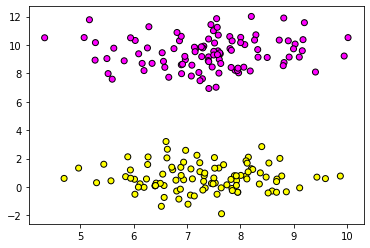

In [8]:
# KNN 2 class(centers)
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = make_blobs(n_samples=200, n_features=2, centers=2, random_state=8)
X, y = data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.spring, edgecolor='k')
plt.show()

In [19]:
#help(make_blobs)

In [16]:
# KNN 2 class(centers), part2
import numpy as np
clf = KNeighborsClassifier(n_neighbors=5) # 5 is default value
clf.fit(X, y)

print('预测结果为:', clf.predict([[6.75, 4.82], [5.11, 10]]))

预测结果为: [1 0]


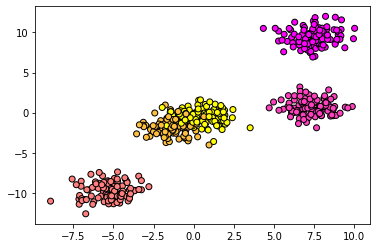

In [21]:
# KNN for multiple classes
data2 = make_blobs(n_samples=500, centers=5, random_state=8)
X2, y2 = data2
plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap=plt.cm.spring, edgecolor='k')
plt.show()

0.956


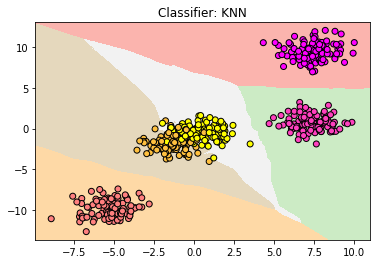

In [47]:
# KNN for multiple classes, part2
clf2 = KNeighborsClassifier()
clf2.fit(X2, y2)
print(clf2.score(X2, y2))

x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

#Z = clf2.predict(np.concatenate((np.array([xx.ravel()]), np.array([yy.ravel()])), axis=0).T)
Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap=plt.cm.spring, edgecolor='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Classifier: KNN')
plt.show()

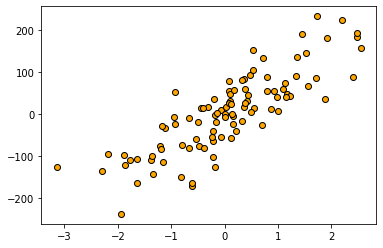

In [51]:
# KNN in regression
from sklearn.datasets import make_regression
X, y = make_regression(n_features=1, n_informative=1, noise=50, random_state=8)
plt.scatter(X, y, c='orange', edgecolor='k')
plt.show()

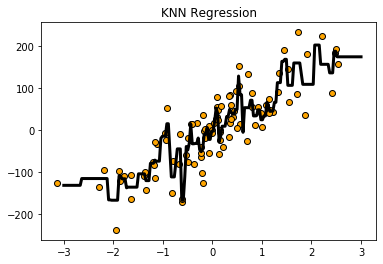

0.8581798802065704


In [57]:
# KNN in regression, part2
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=2)

reg.fit(X, y)
z = np.linspace(-3, 3, 200).reshape(-1, 1) # convert to column vector, -1 means unspecified; (1, -1) conver to row
plt.scatter(X, y, c='orange', edgecolor='k')
plt.plot(z, reg.predict(z), c='k', linewidth=3)
plt.title('KNN Regression')
plt.show()
print(reg.score(X, y))

In [68]:
# KNN in practice: wine classification
from sklearn.datasets import load_wine
wine_dataset = load_wine()

print(wine_dataset.keys())
print(wine_dataset['data'].shape)

# split train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine_dataset['data'], 
                                                    wine_dataset['target'], test_size=0.25, random_state=0)

# fit KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

# score on test set
print(knn.score(X_test, y_test))

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
(178, 13)
0.7555555555555555
